In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Let's generate a random 2x2 matrix and look at the dynamics of the resulting linear system
$$
\begin{bmatrix}
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}
=
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
$$
$$\dot{x} = Ax$$

In [182]:
A = 20*rand(2, 2) - 10
print('A=')
print(A)
L, V = eig(A) ## the function `eig` computes numerical approximation for eigenvalues and eigenvectors
print('eigenvalues=')
print(L)
V = matrix(V) # the eigenvectors v1 and v2 are the columns of the matrix V
def xsol(t, x0): # the solution to the linear system, given a time t and an initial condition x0
    c = V.I*x0 # the constants are determined by the initial condition
    return V*diag(exp(L*t))*c # this is equivalent to c1*v1*exp(lambda1*t) + c2*v2*exp(lambda2*t)

A=
[[-6.82897763 -1.38342612]
 [-1.63307963 -3.19815193]]
eigenvalues=
[-7.37046291 -2.65666664]


# We will pick 10 random inital conditions and plot the trajectories

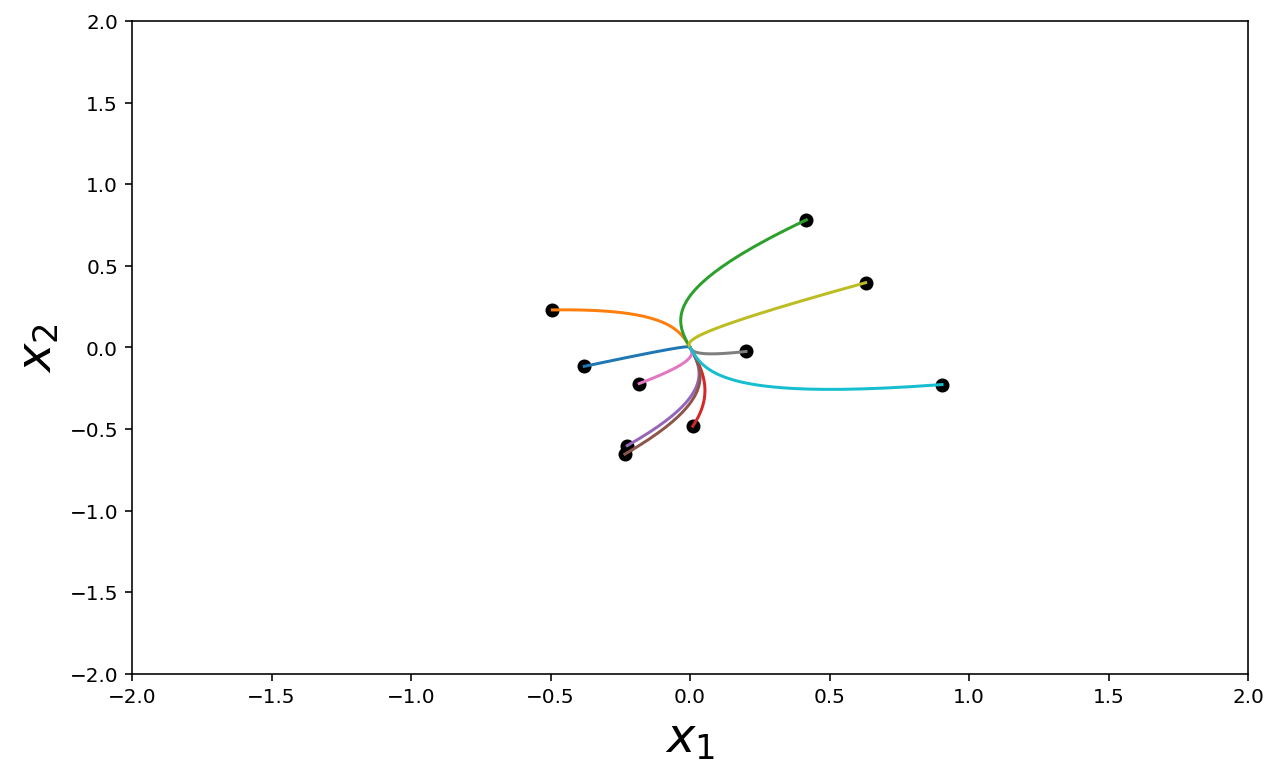

In [183]:
t = linspace(0, 2, 200)
figure(1, [10, 6])
for n in arange(10):
    x0 = matrix(2*rand(2) -1).reshape(2, 1) # pick a random initial condition
    x = array([xsol(tn, x0) for tn in t]) # make the solution
    plot(x0[0], x0[1], 'ok') # plot the inital condition
    plot(x[:, 0], x[:, 1]) # plot the trajectory
xlim(-2, 2)
ylim(-2, 2);
xlabel('$x_1$', fontsize=24)
ylabel('$x_2$', fontsize=24);

# Traffic Light problem from Homework 1
$$
\text{Green}
{{\alpha \atop\longrightarrow}\atop {\longleftarrow \atop \beta }}
\text{Red}
$$
The Master equation for the probability distribution
$$ p(t) = 
\begin{bmatrix}
p_0(t) \\
p_1(t)
\end{bmatrix},
$$
is given by
$$
\frac{dp}{dt} = 
\begin{bmatrix}
-\alpha & \beta \\
\alpha & -\beta
\end{bmatrix}
p
$$
The stationary distribution is
$$ \lim_{t\to\infty}p(t) = \rho =
\begin{bmatrix}
\frac{\alpha}{\alpha + \beta} \\
\frac{\beta}{\alpha + \beta}
\end{bmatrix}.
$$

As $t \to \infty$, the total fraction of time the light is green is $\rho_1 = \frac{\beta}{\alpha + \beta}$.
It follows that the fraction of time the light is red is $1-\rho_1 = \rho_0 = \frac{\alpha}{\alpha + \beta}$.

In [184]:
alpha = 1
beta = 2
n0 = 0
Nsteps = 10000
Tgreen = 0
t = 0
N = n0
for j in arange(Nsteps):
    u = rand(1)[0]
    tau = -log(u)/((N==0)*alpha + (N==1)*beta)
    t += tau
    N = 0 if N==1 else 1
    if N == 1:
        Tgreen += tau
fraction = Tgreen/t
print('The fraction of time the light is green is')
print(fraction)
print('Compare to the exact formula:')
print(beta/(alpha + beta))

The fraction of time the light is green is
0.6651056168273671
Compare to the exact formula:
0.6666666666666666


# Fishing model from Homework 1

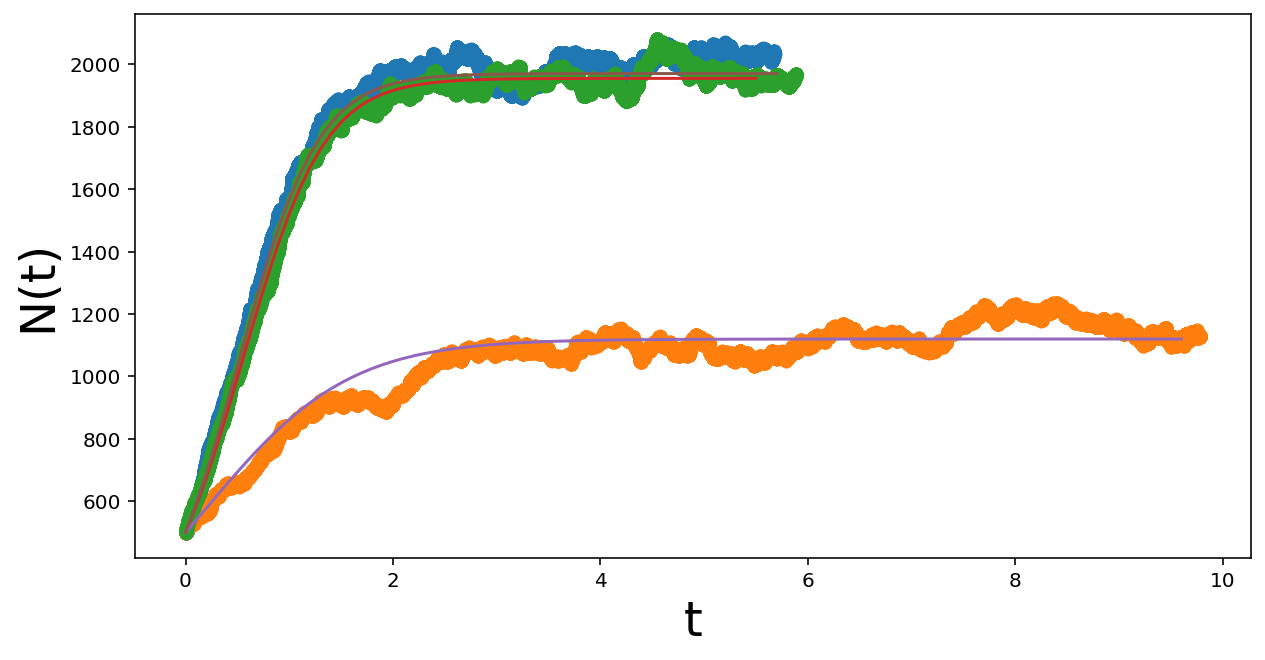

In [181]:
epsilon = 0.01 # TRY CHANGING THIS VALUE
r = 2.5
H = 1.1
A = 10
K = 20.
x0 = 5.
n0 = int(x0/epsilon)
Nsteps = 50000


def stochastic_fishing_M1(r, K, epsilon, H, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = n*r + epsilon*n**2*r/K + H
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = n*r/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1

        if N[j] == 0:
                break
    return T, N
def stochastic_fishing_M2(r, K, epsilon, H, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = n*r + epsilon*n**2*r/K + H*n
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = n*r/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1

        if N[j] == 0:
                break
    return T, N
def stochastic_fishing_M3(r, K, epsilon, H, A, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = n*r + epsilon*n**2*r/K + H*n/(A + epsilon*n)
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = n*r/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1

        if N[j] == 0:
                break
    return T, N
def fishing_ode_M1(r, K, H, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K) - H
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
        if x[n] <= 0:
            break
    t = Delta_t*arange(Nsteps)
    return t, x 
def fishing_ode_M2(r, K, H, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K) - H*x
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
        if x[n] <= 0:
            break
    t = Delta_t*arange(Nsteps)
    return t, x 
def fishing_ode_M3(r, K, H, A, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K) - H*x/(A + x)
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
        if x[n] <= 0:
            break
    t = Delta_t*arange(Nsteps)
    return t, x 
    
######## plot the result
fig1 = figure(1, [10, 5])
T1, N1 = stochastic_fishing_M1(r, K, epsilon, H, n0, Nsteps)
T2, N2 = stochastic_fishing_M2(r, K, epsilon, H, n0, Nsteps)
T3, N3 = stochastic_fishing_M3(r, K, epsilon, H, A, n0, Nsteps)
plot(T1, N1, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
plot(T2, N2, '-o')
plot(T3, N3, '-o')
## make a logistic ODE curve for comparison
Tode1, Xode1 = fishing_ode_M1(r, K, H, x0, int(T1[-1]/0.1))
Tode2, Xode2 = fishing_ode_M2(r, K, H, x0, int(T2[-1]/0.1))
Tode3, Xode3 = fishing_ode_M3(r, K, H, A, x0, int(T3[-1]/0.1))
## remember to convert X to N
Node1 = Xode1/epsilon
Node2 = Xode2/epsilon
Node3 = Xode3/epsilon
plot(Tode1, Node1)
plot(Tode2, Node2)
plot(Tode3, Node3)
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

# Fishing model 3: Allee effect
An 'allee' effect occurs when the model has three fixed points: a stable fixed point at $x=0$, an unstable fixed point at $\hat{x}_1>0$ and a stable carrying capacaty at $\hat{x}_2 > \hat{x}_1$. When the population drops below the unstable fixed point $\hat{x}_1$, the population converges to the zero fixed point which corresponds to extinction. This models the effect of a minimum viable population necessary to thrive with a stable long term population level.

For certain parameter values, the fishing model can display this behavior. Here, I've modified the birth rate to be $\epsilon + rN$ so that extinction is impossible. What we see is an example of stochastic switching between the stable fixed points of the ODE model.

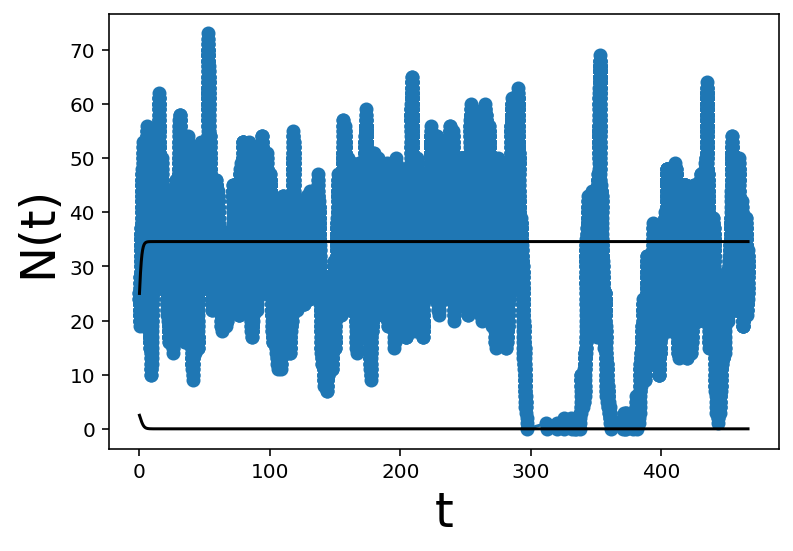

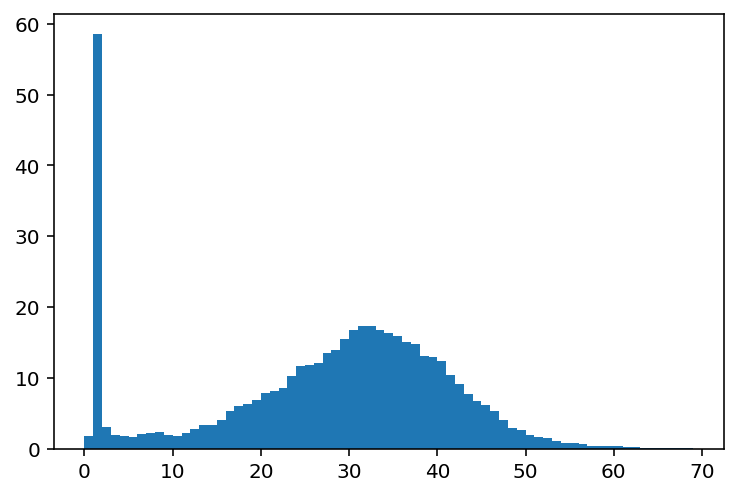

In [180]:
epsilon = 0.2 # TRY CHANGING THIS VALUE
r = 2.
K = 10.
H = 5.5
A = 2.
# K = 1.
n0 = int(5/epsilon)
Nsteps = 50000
N = zeros(Nsteps)
N[0] = n0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    n = N[j-1]
    combined_rate = epsilon + n*r + n**2*epsilon*r/K + H*n/(A + epsilon*n)
    u = rand(1)
    tau = -log(u)/combined_rate
    T[j] = T[j-1] + tau # update time array with new time value
    ## now we make a random variable to decide if birth or death occurs
    probability_of_birth = (epsilon + n*r)/combined_rate
    probability_of_death = 1 - probability_of_birth
    u2 = rand(1)
    if u2 < probability_of_birth:
        N[j] = N[j-1] + 1 # a birth means N -> N+1
    else:
        N[j] = N[j-1] - 1
        
#     if N[j] == 0:
#         T = T[:j+1]
#         N = N[:j+1]
#         break
        
def ode(x0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_ode(x): # the ligistic growth RHS function
        return r*x*(1-x/K) - H*x/(A + x)
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_ode(x[n-1])
    t = Delta_t*arange(Nsteps)
    return t, x 
    
Tode1, Xode1 = ode(.5, T[-1])
Tode2, Xode2 = ode(5, T[-1])
######## plot the result
figure(1)
plot(T, N, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
plot(Tode1, Xode1/epsilon, 'k')
plot(Tode2, Xode2/epsilon, 'k')
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

figure(2)
P, b = histogram(N[1:], bins=50, weights=diff(T));
# semilogy(b[:-1], P)
# bar(b[:-1], P)
hist(N[1:],  bins=arange(70), weights=diff(T));